The models implemented in this Code are : Linear Regression , K nearest  Neighbors , SVM and LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


#read the file  this data is for Apple stocks 
df = pd.read_csv('AAPL.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,228.410004,229.179993,226.630005,228.360001,224.870499,27390100
1,2018-09-05,228.990005,229.669998,225.100006,226.869995,223.403275,33333000
2,2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
3,2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
4,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500


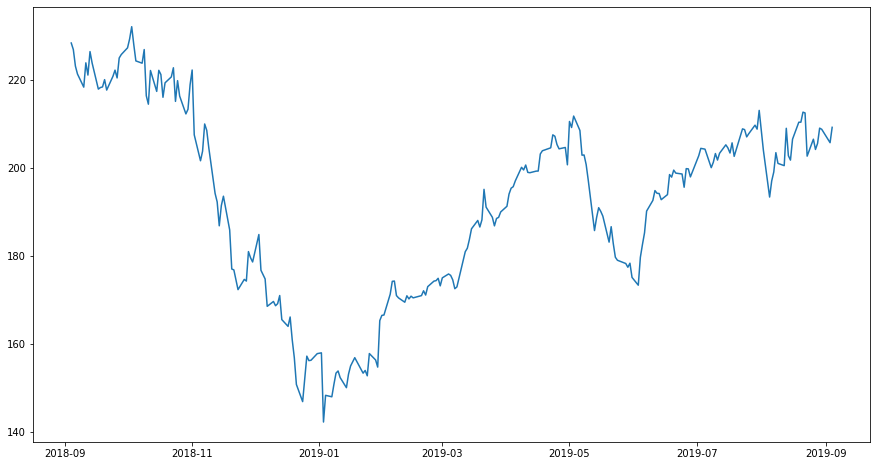

In [23]:
#setting date as the index
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']
# we plot the close values for visualization (as they are our target)
plt.figure(figsize=(15,8))
plt.plot(df.Close,label='Close Price History')

In [24]:
#creating data frame with only 2 variables : Data and Close 
data=df.sort_index(ascending=True,axis=0)#sorting
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])##creating a separate dataset

for i in range (0,len(data)):
     new_data['Date'][i]=data['Date'][i]
     new_data['Close'][i]=data['Close'][i]


In [25]:
#create features
from fastai.tabular import  add_datepart #I installed fastai==1.0 if u have an older version try fastai.structred <3 Siraj
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  

In [26]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
#If the day of week is equal to 0 or 4(Monday or friday), the column value will be 1, otherwise 0
#the assumption made is that adding this feature can have an impact to the prediction since stocks price 
#change in the first and end of the week

        


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
new_data

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,228.36,2018,9,36,4,1,247,False,False,False,False,False,False,0
1,226.87,2018,9,36,5,2,248,False,False,False,False,False,False,0
2,223.1,2018,9,36,6,3,249,False,False,False,False,False,False,0
3,221.3,2018,9,36,7,4,250,False,False,False,False,False,False,1
4,218.33,2018,9,37,10,0,253,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,205.53,2019,8,35,28,2,240,False,False,False,False,False,False,0
248,209.01,2019,8,35,29,3,241,False,False,False,False,False,False,0
249,208.74,2019,8,35,30,4,242,False,False,False,False,False,False,1
250,205.7,2019,9,36,3,1,246,False,False,False,False,False,False,0


In [27]:
#split into train and validation
train = new_data[:200]
valid = new_data[200:]
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [28]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

33.14248268604172

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


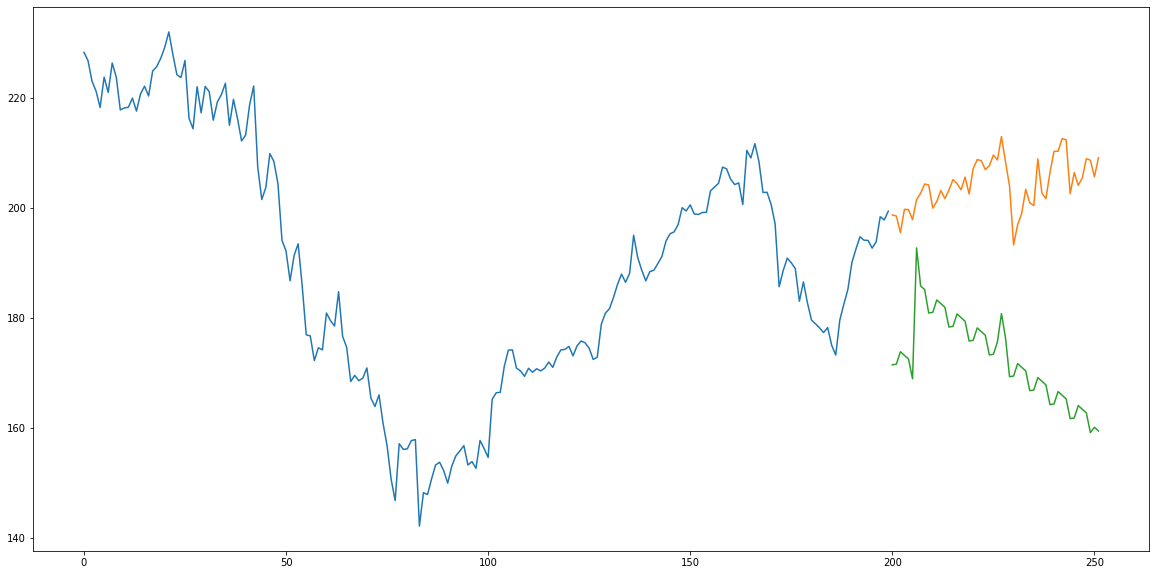

In [30]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[200:].index
train.index = new_data[:200].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

 we can try an other model from Sickit-learn which is k-Nearest Neighbours



In [19]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [31]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype bool, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [32]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

20.376174525715818

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


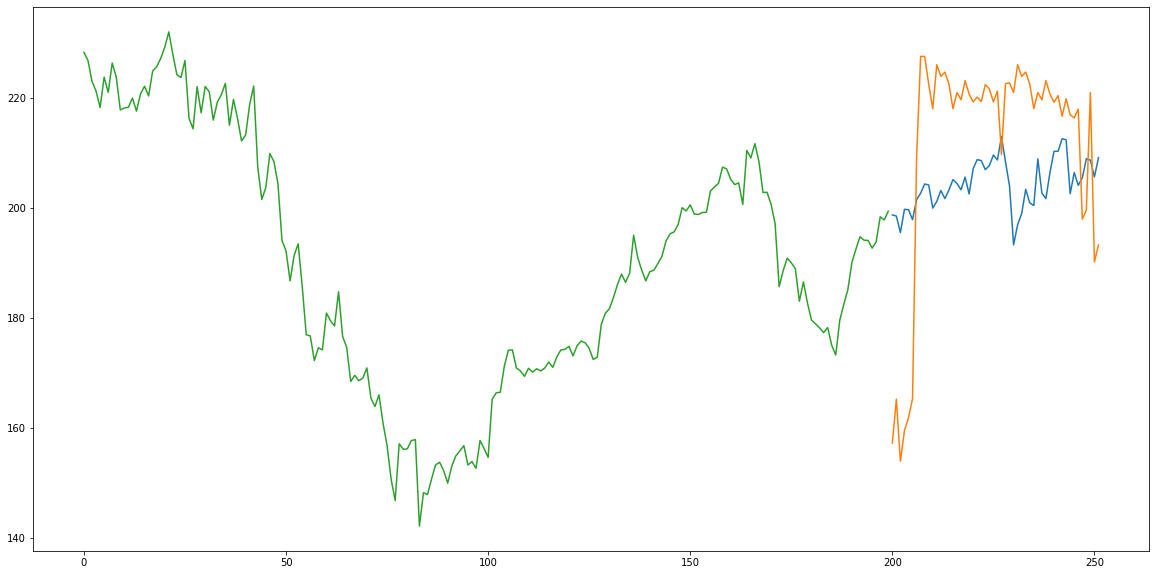

In [33]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])

Now We gonna try with the SVM method 

In [34]:
from sklearn.svm import SVR


In [35]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
#make predictions and find the rmse
preds = svr_rbf.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

37.322119451828016

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


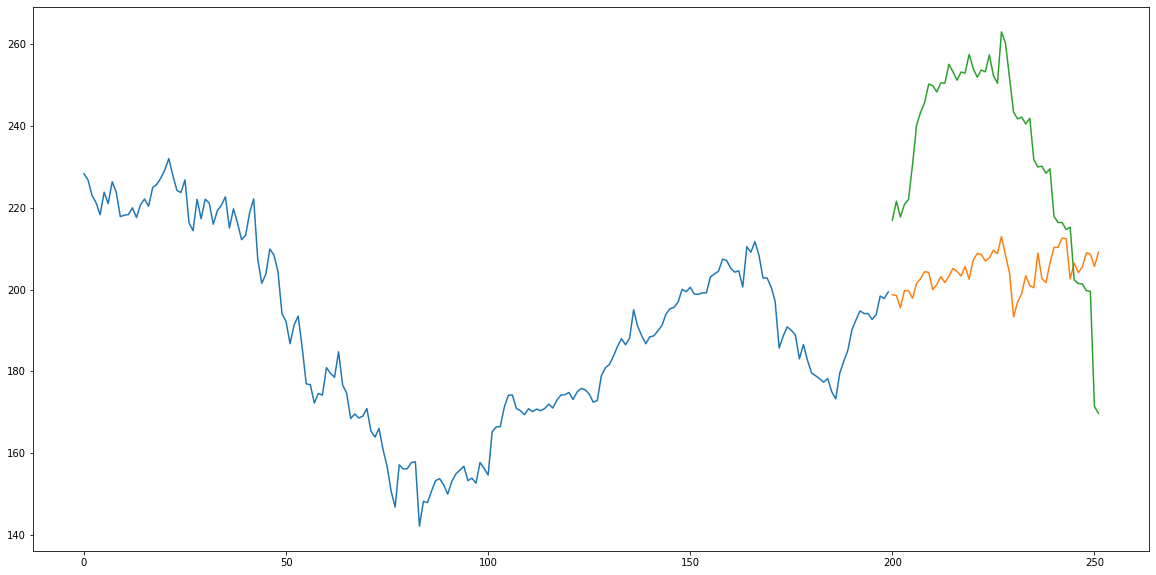

In [37]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[200:].index
train.index = new_data[:200].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

Now That we tested The Machine Learning Models we can try a deep learning Models to see if we can have better results

In [43]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)



In [44]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:200,:]
valid = dataset[200:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 9s - loss: 0.0175
Epoch 2/10
 - 7s - loss: 0.0065
Epoch 3/10
 - 7s - loss: 0.0052
Epoch 4/10
 - 7s - loss: 0.0048
Epoch 5/10
 - 7s - loss: 0.0039
Epoch 6/10
 - 7s - loss: 0.0041
Epoch 7/10
 - 7s - loss: 0.0032
Epoch 8/10
 - 7s - loss: 0.0041
Epoch 9/10
 - 7s - loss: 0.0028
Epoch 10/10
 - 7s - loss: 0.0032


In [53]:
#predicting the values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [54]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [56]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms


Close          6.163665
Predictions    4.747553
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


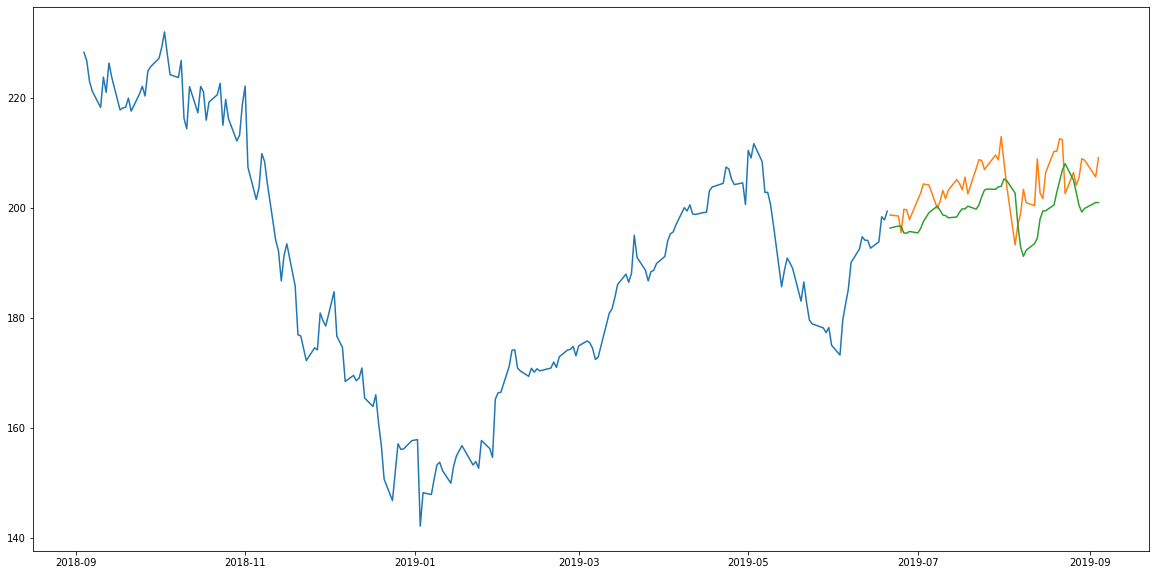

In [57]:
#for plotting
train = new_data[:200]
valid = new_data[200:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

We Can Clearly see That the best model adapted is LSTM 